In [1]:
import sys
import os

# Add the parent directory to the Python path
parent_dir = os.path.abspath('..')
if parent_dir not in sys.path:
    sys.path.append(parent_dir)
    
# import modules
import architectures.DDSP
import auxiliar.seeds
import auxiliar.features
import dataset.makers

# Extra packages
import matplotlib.pyplot as plt
from IPython.display import Audio

# Parameters counter
def count_parameters(model):
    return sum(p.numel() for p in model.parameters())

In [2]:
N_filter_bank = 24
hidden_size   = 256
deepness      = 3
param_per_env = 1024
sampling_rate = 44100
frame_size    = 2**16
time          = frame_size/sampling_rate

seed  = auxiliar.seeds.seed_maker(frame_size, sampling_rate, N_filter_bank)
model_fire = architectures.DDSP.DDSP_TextEnv(hidden_size, deepness, param_per_env, seed)

# print the amount of parameters of the torch model
print("number of paramenters:            ",count_parameters(model_fire))
# print("number of paramenters per second: ",int(count_parameters(model_fire) / time))

number of paramenters:             14150656


In [3]:
# Trying forward pass on the dataset

from torch.utils.data import DataLoader

# Fire dataset creation
# Dataset parameters
audio_path    = ".."+"/sounds/fire.wav"
frame_size    = frame_size # = 2**16 is around 1.5 seconds
hop_size      = 2**15      # samples are 50% overlapped
sampling_rate = sampling_rate
features_annotator = auxiliar.features.features_freqavg_rate # for fire, the features will be sp centroid and rate
freq_avg_level = 4         # The spectral centroid will et more informative by pushing it a little

# Dataset creation
dataset_raw  = dataset.makers.DDSP_Dataset(audio_path, frame_size, hop_size, sampling_rate, features_annotator, freq_avg_level)
dataset_fire = dataset_raw.compute_dataset()

# Dataloader
batch_size = 12
dataloader = DataLoader(dataset_fire, batch_size=batch_size, shuffle=True)
print("Dataset loaded into dataloader")


Audio loaded from  ../sounds/fire.wav
Final dataset size will be:  106
Computing dataset
...
Dataset computed!
Dataset loaded into dataloader


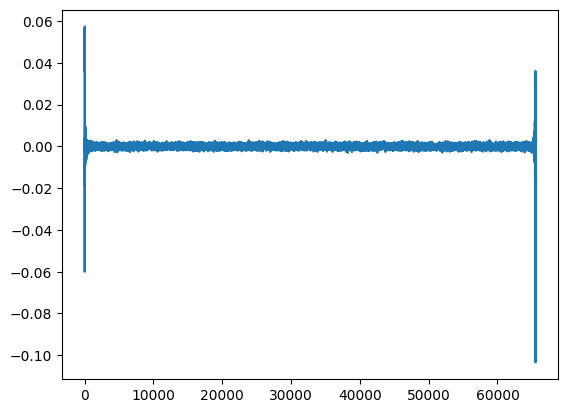

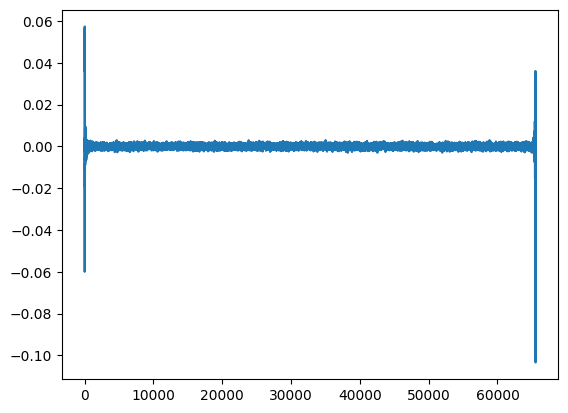

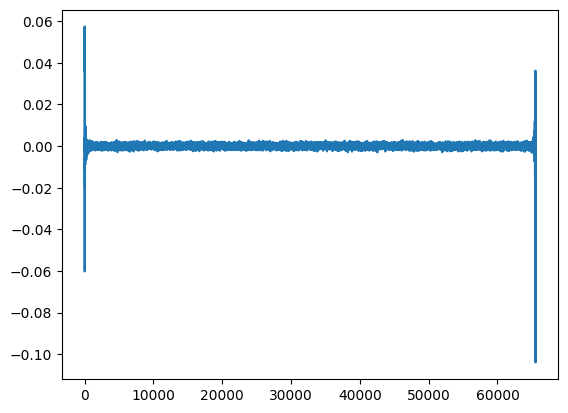

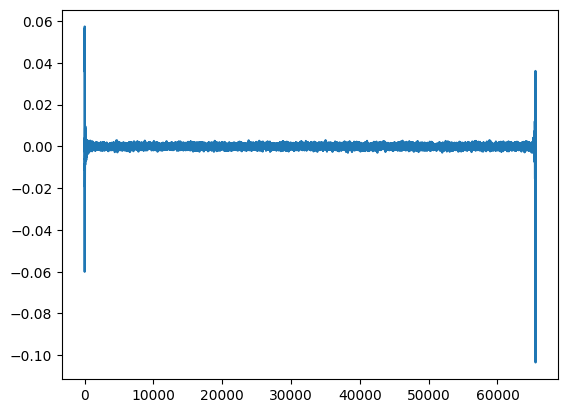

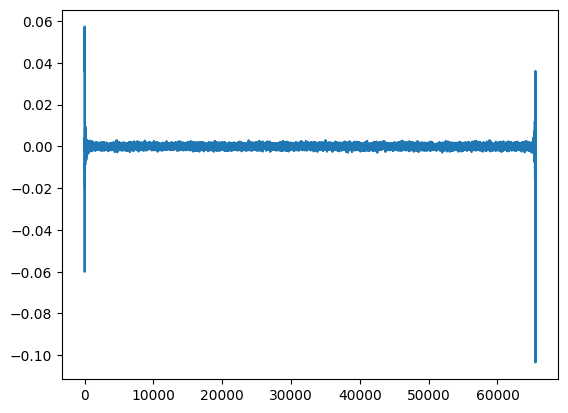

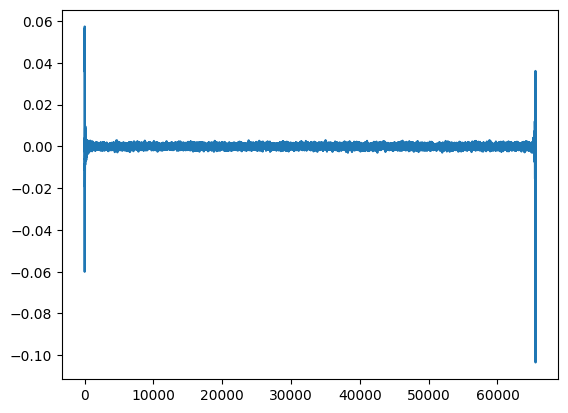

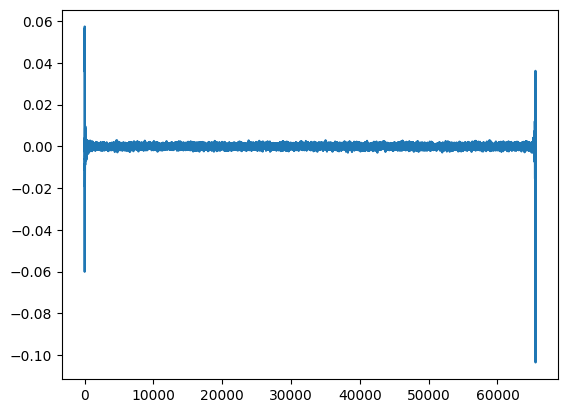

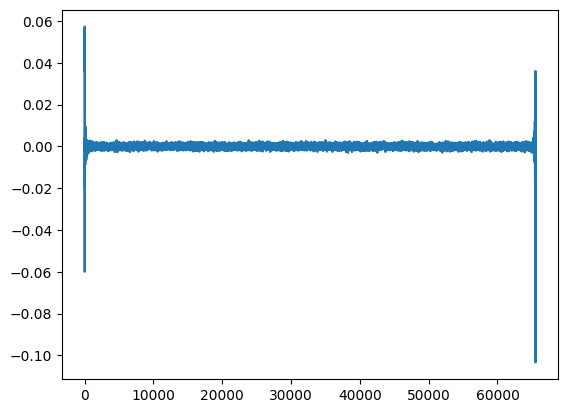

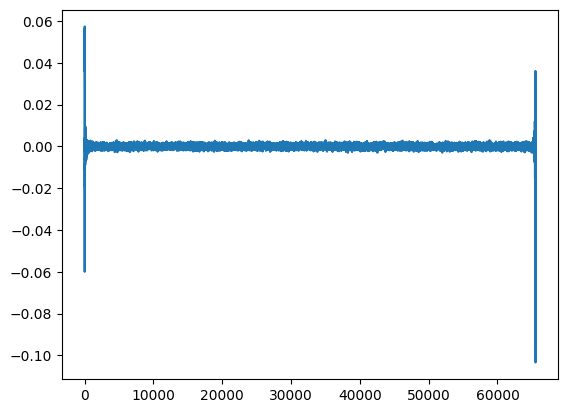

In [4]:
import numpy as np

# run forward pass of the model called model_fire in the dataloader
for batch in dataloader:
    features, segments = batch
    feature_0 = features[0].unsqueeze(1)
    feature_1 = features[1].unsqueeze(1)
    output_batch = model_fire(feature_0, feature_1)
    # create random number from 0 to batch_size
    random_index = np.random.randint(0, batch_size)
    # take the random index from the batch and transofmr to numpy
    output = output_batch[random_index,:].detach().numpy()
    # plot and play the output
    plt.plot(output)
    plt.show()
    display(Audio(output, rate=sampling_rate))
    